In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Exploratory Data Analysis

**Make sure the file facebook_combined.txt is in a directory named data.**

In [3]:
G_fb = nx.read_edgelist("data/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [4]:
# Quick snapshot of the network
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [5]:
# Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


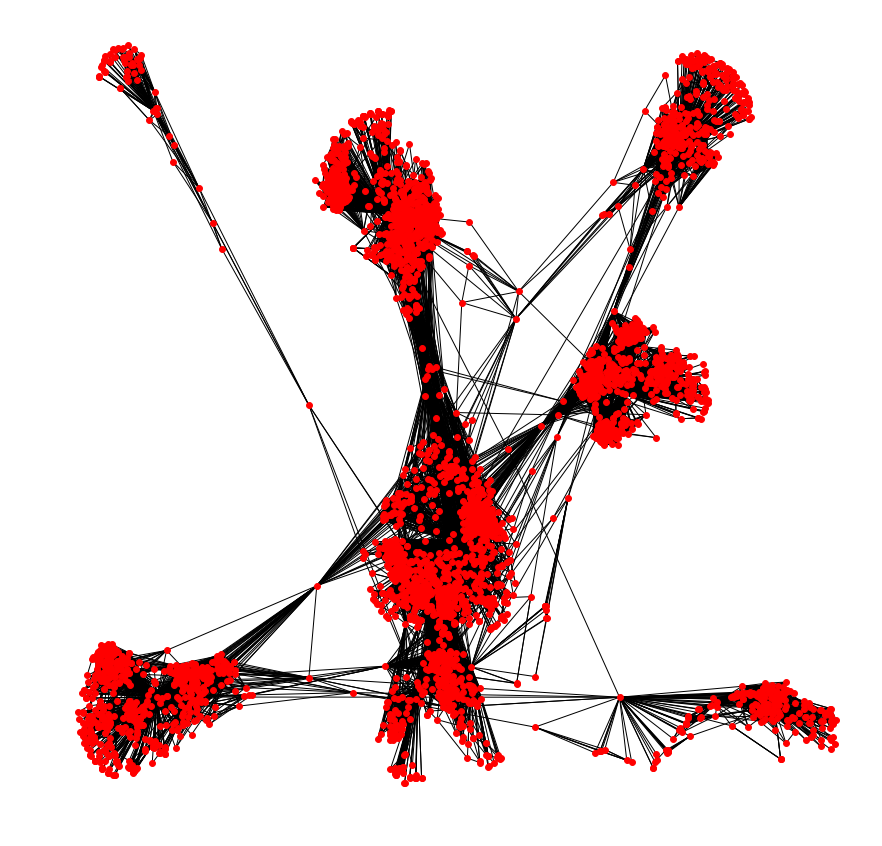

In [7]:
plt.figure(figsize=(15, 15))
plt.axis("off")
nx.draw_networkx(G_fb, pos=spring_pos, with_labels=False, node_size=35)

The `spring_layout` (also known as Fruchterman-Reingold) is one of several algorithms to position nodes:  

`random_layout`  
`bipartite_layout`  
`circular_layout`  
`kamada_kawai_layout`  
`shell_layout`  
`spectral_layout`  

**Task 1.**  Use `help(nx.layout)` to read about node positioning algorithms.

**Task 2.** Use the NetworkX [documentation](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) to read about node positioning algorithms.  
Then read the documentation about the parameters of the spring layout algorithm.  
Is there a way to move nodes further apart in the spring layout?

A small subgraph reveals (part of) the ego network E of friends of the first facebook user (node 0).  
This node is referred to as 'ego' and is the central node in the ego network.  
The other nodes in the ego network (the friends of ego) are referered to as 'alters'.

In [8]:
E = G_fb.subgraph(list(range(100)))

In [9]:
E.nodes()  # list of nodes: ego 0 and alters 1-99

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [10]:
list(E.edges())  # list of edges: ego-alter links (0, 1), (0, 2), etc. as well as links between alters, for example, (1, 48)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (1, 48),
 (1, 53),

In [11]:
# Quick snapshot of the ego network
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 275
Average degree:   5.5000


The number of possible edges between the friends of ego is 4851.

In [13]:
print(int((99 * 98) / 2))

4851


**Task 3.** According to the snapshot of E, how many edges exist between the friends of ego (the alters), not counting the edges between ego and alters?

**Task 4.** Create a new network layout kk_pos for ego network E using the Kamada-Kawai algorithm.

NameError: name 'kk_pos' is not defined

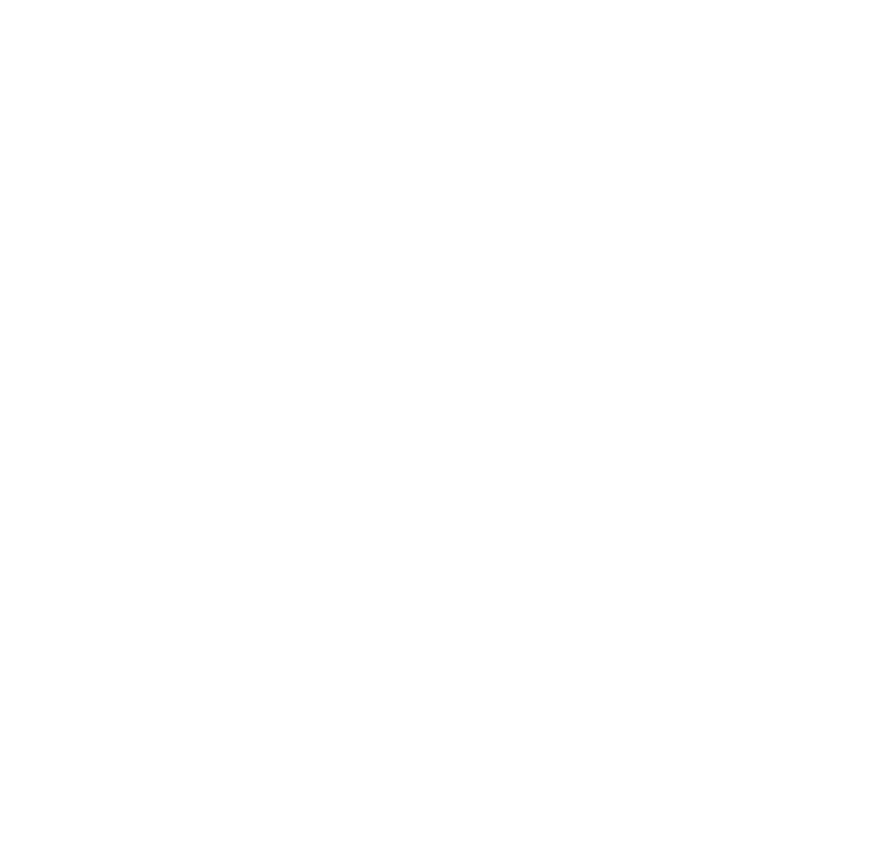

In [14]:
plt.figure(figsize=(15, 15))
plt.axis("off")
nx.draw_networkx(E, pos=kk_pos, with_labels=False, node_size=35)

**Task 4.** Do you see any cliques (e.g. triangles) in the ego network?

The full ego network is likely to have more than 100 nodes. Let's look at the list of edges.

In [16]:
edgesList = [e for e in G_fb.edges() if e[0] == 0]
edgesList

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),
 (0, 101

**Task 5.** Use the list of edges and len() to compute the number of nodes in the full ego network.

**Task 6.** Repeat tasks 1, 2, 3, and 4, using this number of nodes, instead of 100. Do you see any diffences?